# Challenge: Constructing Circuits in Qiskit

In this challenge, we'll construct some basic circuits in Qiskit and run them in the Qiskit Aer simulator. First, you'll examine a circuit that produces an entangled quantum state known as a Bell state. From there, you'll construct larger circuits for producing entanglement among many qubits into GHZ states.

Of course, you can run these circuits on real quantum computers on the IBM Quantum Platform under the open access plan. See this documentation for more information on how to run on the IBM Quantum Platform: https://qiskit.org/ecosystem/ibm-provider/tutorials/1_the_ibm_quantum_account.html


Some material in the notebook was sourced from the Qiskit Global Summer School.

**IMPORTANT**: Several of the challenge questions ask for answers to questions or explanations of your answers. To get full credit for you answers, create markdown cells and fill in your answer in words. Clearly indicate where you have provided an answer so that the judges can clearly see it.

In [3]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.quantum_info import *

import numpy as np

## Quantum Circuits and Entanglement

Let's start out with some basic gates in Qiskit. First, let's examine the X gate (also called the NOT gate) on a single qubit. The X gate transforms the state of a qubit as follows:

1) $X |0\rangle = |1\rangle$
1) $X |1\rangle = |0\rangle$

Put more simply, it flips the qubit between $|0\rangle$ and $|1\rangle$.

In Qiskit, all qubits are initialized in the $|0\rangle$ state. Hence, the circuit below will simply flip the qubit to be in state $|1\rangle$.

Note: the first parameter to the `QuantumCircuit` class is the number of qubits we want in our circuit.

In [4]:
qc = QuantumCircuit(1)    # Create a circuit with 1 qubit
qc.x(0)
qc.draw()

┌───┐
q: ┤ X ├
   └───┘

### Entagling 2 qubits: The Bell state

A Bell state is an entanglement of two qubits. It can be constructed using the circuit below. In this example, we first use the Hadamard gate (H gate) to place qubit 0 into a uniform superposition of $|0\rangle$ and $|1\rangle$. Then, we use a Controlled NOT (CNOT) gate where qubit 0 is the controlling qubit and qubit 1 is the target qubit. The CNOT gate will flip the target qubit if the control qubit is in state $|1\rangle$, but will do nothing if the control qubit is $|0\rangle$. 

The circuit below will produce the following entangled state:

$\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$

We'll run this in the simulator, so we'll need to measure the qubits to see the outcomes. The second parameter in `QuantumCircuit` specifies the number of classical bits that we'll use to store the measurements of the qubits.

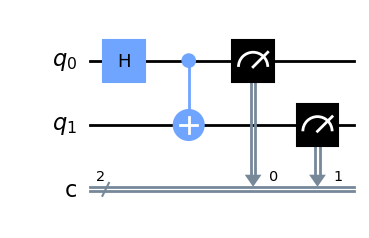

In [5]:
bell = QuantumCircuit(2, 2)     # Create a circuit with 2 qubits and 2 classical bits

bell.h(0) # apply an H gate to the circuit
bell.cx(0,1) # apply a CNOT gate to the circuit
bell.measure([0,1], [0,1])  # measure qubits 0 and 1, and store the results in classical bits 0 and 1

bell.draw(output="mpl")

We can run this circuit in the simulator to see the outcome.

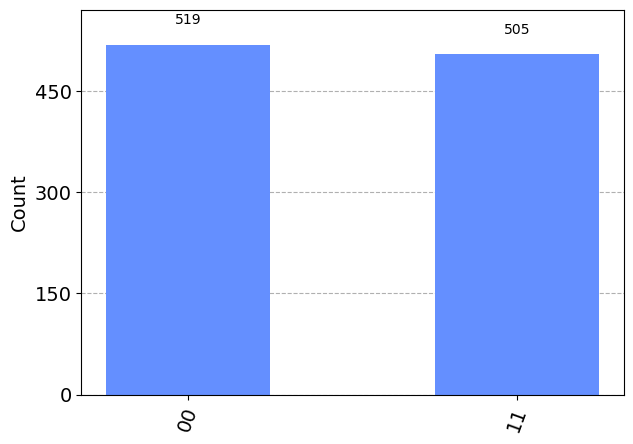

In [6]:
from qiskit_aer import AerSimulator

simulator = AerSimulator()
job = simulator.run(bell)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

You should see that the get $|00\rangle$ about 50% of the time, and $|11\rangle$ about 50% of the time.

**PART 1:** Can you explain why the circuit above gives the state $\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$?

> INSERT ANSWER HERE

**PART 2**: Construct a circuit that gives the following Bell state

$\frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$

Run in the simulator to verify the outcome.

<IPython.core.display.Latex object>

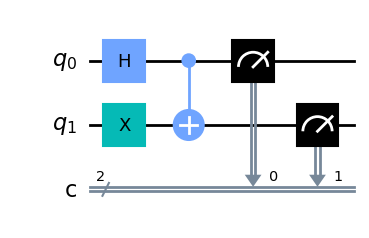

In [7]:
# FILL IN CODE HERE

qc=QuantumCircuit(2,2)

qc.h(0)
qc.x(1)

qc.cx(0,1)

display(Statevector(qc).draw('latex'))

qc.measure([0,1], [0,1])  # measure qubits 0 and 1, and store the results in classical bits 0 and 1

qc.draw(output="mpl")

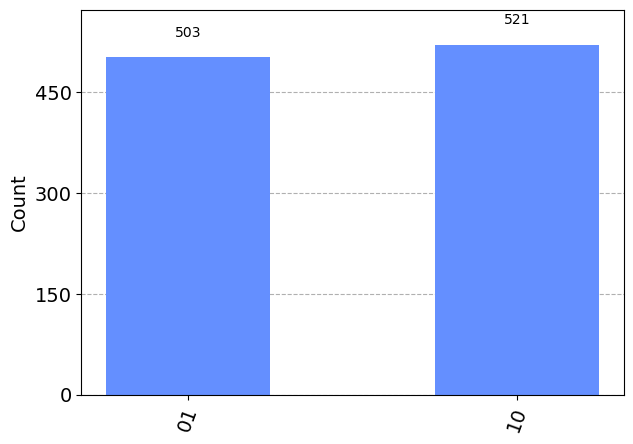

In [8]:
from qiskit_aer import AerSimulator

simulator = AerSimulator()
job = simulator.run(qc)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

## Circuit Complexity

### 1: Complexity of the Number of Gates

We have seen different complexity classes and the big 𝑂 notation and how it can be used with Quantum Algorithms, when using gates. One possible way to calculate the complexity of an algorithm is to just count the number of gates used.

Another often seen measure is to count the number of multi qubit gates rather than all gates, since they are normally "more expensive" than other gates. In our case "more expensive" means that they often have a way higher error rate (around 10 times higher) compared to single qubit gates.

So, lets look at a circuit that produces the GHZ state, and extension of the Bell state to more than two qubits. Count the number of gates as well as the number of multi qubit gates:

In [9]:
ghz_qc = QuantumCircuit(3, 3)

ghz_qc.h(0)
ghz_qc.cx(0,1)
ghz_qc.cx(0,2)
ghz_qc.measure(range(3), range(3))

print("Size:", ghz_qc.size())
print("Number of gates:", ghz_qc.num_nonlocal_gates())
ghz_qc.draw()

Size: 6
Number of gates: 2


┌───┐             ┌─┐   
q_0: ┤ H ├──■────■─────┤M├───
     └───┘┌─┴─┐  │  ┌─┐└╥┘   
q_1: ─────┤ X ├──┼──┤M├─╫────
          └───┘┌─┴─┐└╥┘ ║ ┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     1  0  2

Now run this in the simulator. You should get an outcome corresponding to the GHZ state

$\frac{1}{\sqrt{2}}(|000\rangle + |111\rangle)$

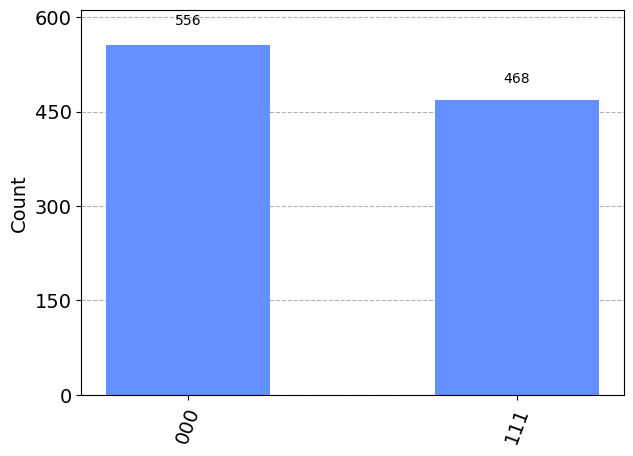

In [10]:
simulator = AerSimulator()
job = simulator.run(ghz_qc)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

**PART 3**: Create a function that can generate the GHZ state to an arbitrary number of qubits. How does the depth of the circuit scale with the number of qubits?

In [11]:
# FILL IN CODE HERE
def create_ghz_state(num_qubits):

    circuit = QuantumCircuit(num_qubits)

    # Apply a Hadamard gate to the first qubit
    circuit.h(0)

    # Apply Controlled-X (CNOT) gates
    for i in range(num_qubits - 1):
        circuit.cx(i, i + 1)

    return circuit

> INSERT EXPLANATION OF CIRCUIT SCALING HERE

### 2: Complexity of the Depth of a Circuit¶

When it comes to how well a circuit runs on an actual Quantum Computer the number of gates is not the only important factor.

The depth of the circuit tells how many "layers" of quantum gates, executed in parallel, it takes to complete the computation defined by the circuit.

Now we look at two simple examples to show what the depth of a circuit is:

In [12]:
qc = QuantumCircuit(4)

qc.h(0)
qc.s(0)
qc.s(0)
qc.s(0)
qc.cx(0,1)
qc.cx(1,3)

print(qc.depth())
display(Statevector(qc).draw('latex'))
qc.draw()

6


<IPython.core.display.Latex object>

┌───┐┌───┐┌───┐┌───┐          
q_0: ┤ H ├┤ S ├┤ S ├┤ S ├──■───────
     └───┘└───┘└───┘└───┘┌─┴─┐     
q_1: ────────────────────┤ X ├──■──
                         └───┘  │  
q_2: ───────────────────────────┼──
                              ┌─┴─┐
q_3: ─────────────────────────┤ X ├
                              └───┘

In [13]:
qc2 = QuantumCircuit(4)

qc2.h(0)
qc2.s(1)


qc2.cx(0,1)

qc2.s(2)
qc2.s(3)

qc2.cx(2,3)

display(Statevector(qc2).draw('latex'))
print(qc2.depth())

qc2.draw()


<IPython.core.display.Latex object>

2


┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ S ├┤ X ├
     ├───┤└───┘
q_2: ┤ S ├──■──
     ├───┤┌─┴─┐
q_3: ┤ S ├┤ X ├
     └───┘└───┘

The length of the circuit above corresponds with the width. And as you can see, both circuits have the same number of gates, but the first circuit has a much higher depth, because all the gates depend on the gates before, so nothing can be done in parallel.

In short, the more of the gates can be applied in parallel, because they apply to different qubits, the lower will the depth of a circuit be. The lower bound on the depth of a circuit (if it has only single qubit gates and they are evenly distributed) is the number of gates divided by the number of qubits.

On the other hand, if every gate in a quantum circuit depends on the same qubit, the depth will be the same as the number of gates.


Now recall the GHZ circuit example. The most straightforward way to construct that circuit is to sequentially entangle pairs of qubuts. As you likely noticed, this scales poorly. Let’s try to do this better! Its quite clear that we can’t do Step 1 (entangling the first two qubits) better, but step 2 (entangling the remaining qubits) can be done a lot better. 

**PART 4**: Create a function that generates an GHZ circuit for an arbitrary number of qubits, but with a reduced depth. Demonstrate with by running your function on at least 16 qubits. Explain how your solution addressses the problem of reducing the depth

Hint: For a 16 qubit GHZ circuit, a minimum depth circuit should only need 4 steps, instead of 31! Think about what kind of asymptotic running time would cause only 4 operations. And don't forget that the final depth will be 6 (Step 1 and 2 combined, plus the measurements at the end of the circuit).

In [15]:
# FILL IN CODE HERE
import math
def create_new_ghz_state(num_qubits):
    n=2*num_qubits
    circuit = QuantumCircuit(n,n)
    
    for i in range(0,n,2):
        circuit.h(i)
        circuit.cx(i,i+1)
        if(i>0):
            circuit.cx(i,i-1)
            circuit.x(i)
        circuit.measure(i+1,i+1)
    return circuit

ghz_new_qc=create_new_ghz_state(16)


print(ghz_new_qc.depth())
ghz_new_qc.draw()

5


┌───┐                                                                    »
 q_0: ┤ H ├──■─────────────────────────────────────────────────────────────────»
      └───┘┌─┴─┐┌─┐┌───┐                                                       »
 q_1: ─────┤ X ├┤M├┤ X ├───────────────────────────────────────────────────────»
      ┌───┐└───┘└╥┘└─┬─┘┌───┐                                                  »
 q_2: ┤ H ├──■───╫───■──┤ X ├──────────────────────────────────────────────────»
      └───┘┌─┴─┐ ║  ┌─┐ ├───┤                                                  »
 q_3: ─────┤ X ├─╫──┤M├─┤ X ├──────────────────────────────────────────────────»
      ┌───┐└───┘ ║  └╥┘ └─┬─┘┌───┐                                             »
 q_4: ┤ H ├──■───╫───╫────■──┤ X ├─────────────────────────────────────────────»
      └───┘┌─┴─┐ ║   ║   ┌─┐ ├───┤                                             »
 q_5: ─────┤ X ├─╫───╫───┤M├─┤ X ├─────────────────────────────────────────────»
      ┌───┐└───┘ ║   ║   └╥┘ └─┬─┘┌───┐                                        »
 q_6: ┤ H ├──■───╫───╫────╫────■──┤ X ├────────────────────────────────────────»
      └───┘┌─┴─┐ ║   ║    ║   ┌─┐ ├───┤                                        »
 q_7: ─────┤ X ├─╫───╫────╫───┤M├─┤ X ├────────────────────────────────────────»
      ┌───┐└───┘ ║   ║    ║   └╥┘ └─┬─┘┌───┐                                   »
 q_8: ┤ H ├──■───╫───╫────╫────╫────■──┤ X ├───────────────────────────────────»
      └───┘┌─┴─┐ ║   ║    ║    ║   ┌─┐ ├───┤                                   »
 q_9: ─────┤ X ├─╫───╫────╫────╫───┤M├─┤ X ├───────────────────────────────────»
      ┌───┐└───┘ ║   ║    ║    ║   └╥┘ └─┬─┘┌───┐                              »
q_10: ┤ H ├──■───╫───╫────╫────╫────╫────■──┤ X ├──────────────────────────────»
      └───┘┌─┴─┐ ║   ║    ║    ║    ║   ┌─┐ ├───┤                              »
q_11: ─────┤ X ├─╫───╫────╫────╫────╫───┤M├─┤ X ├──────────────────────────────»
      ┌───┐└───┘ ║   ║    ║    ║    ║   └╥┘ └─┬─┘┌───┐                         »
q_12: ┤ H ├──■───╫───╫────╫────╫────╫────╫────■──┤ X ├─────────────────────────»
      └───┘┌─┴─┐ ║   ║    ║    ║    ║    ║   ┌─┐ ├───┤                         »
q_13: ─────┤ X ├─╫───╫────╫────╫────╫────╫───┤M├─┤ X ├─────────────────────────»
      ┌───┐└───┘ ║   ║    ║    ║    ║    ║   └╥┘ └─┬─┘┌───┐                    »
q_14: ┤ H ├──■───╫───╫────╫────╫────╫────╫────╫────■──┤ X ├────────────────────»
      └───┘┌─┴─┐ ║   ║    ║    ║    ║    ║    ║   ┌─┐ ├───┤                    »
q_15: ─────┤ X ├─╫───╫────╫────╫────╫────╫────╫───┤M├─┤ X ├────────────────────»
      ┌───┐└───┘ ║   ║    ║    ║    ║    ║    ║   └╥┘ └─┬─┘┌───┐               »
q_16: ┤ H ├──■───╫───╫────╫────╫────╫────╫────╫────╫────■──┤ X ├───────────────»
      └───┘┌─┴─┐ ║   ║    ║    ║    ║    ║    ║    ║   ┌─┐ ├───┤               »
q_17: ─────┤ X ├─╫───╫────╫────╫────╫────╫────╫────╫───┤M├─┤ X ├───────────────»
      ┌───┐└───┘ ║   ║    ║    ║    ║    ║    ║    ║   └╥┘ └─┬─┘┌───┐          »
q_18: ┤ H ├──■───╫───╫────╫────╫────╫────╫────╫────╫────╫────■──┤ X ├──────────»
      └───┘┌─┴─┐ ║   ║    ║    ║    ║    ║    ║    ║    ║   ┌─┐ ├───┤          »
q_19: ─────┤ X ├─╫───╫────╫────╫────╫────╫────╫────╫────╫───┤M├─┤ X ├──────────»
      ┌───┐└───┘ ║   ║    ║    ║    ║    ║    ║    ║    ║   └╥┘ └─┬─┘┌───┐     »
q_20: ┤ H ├──■───╫───╫────╫────╫────╫────╫────╫────╫────╫────╫────■──┤ X ├─────»
      └───┘┌─┴─┐ ║   ║    ║    ║    ║    ║    ║    ║    ║    ║   ┌─┐ ├───┤     »
q_21: ─────┤ X ├─╫───╫────╫────╫────╫────╫────╫────╫────╫────╫───┤M├─┤ X ├─────»
      ┌───┐└───┘ ║   ║    ║    ║    ║    ║    ║    ║    ║    ║   └╥┘ └─┬─┘┌───┐»
q_22: ┤ H ├──■───╫───╫────╫────╫────╫────╫────╫────╫────╫────╫────╫────■──┤ X ├»
      └───┘┌─┴─┐ ║   ║    ║    ║    ║    ║    ║    ║    ║    ║    ║   ┌─┐ ├───┤»
q_23: ─────┤ X ├─╫───╫────╫────╫────╫────╫────╫────╫────╫────╫────╫───┤M├─┤ X ├»
      ┌───┐└───┘ ║   ║    ║    ║    ║    ║    ║    ║    ║    ║    ║   └╥┘ └─┬─┘»
q_24: ┤ H ├──■───╫───╫────╫────╫────╫

Now simulate your circuit to verify that you get the correct GHZ state.


KeyboardInterrupt



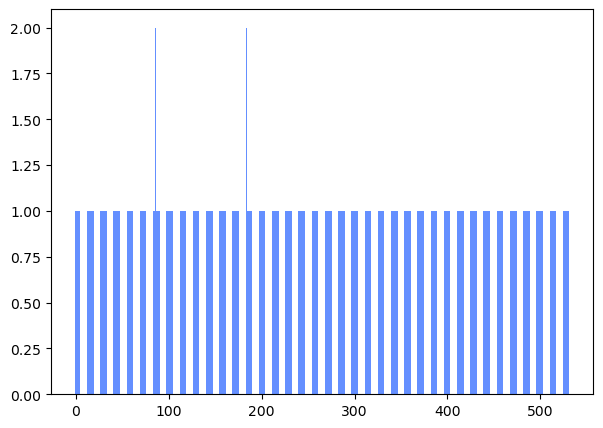

In [18]:
simulator = AerSimulator()
job = simulator.run(ghz_new_qc)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

> EXPLAIN HERE HOW YOUR SOLUTION ADDRESSSES THE PROBLEM OF REDUCING THE DEPTH

In [17]:
import qiskit.tools.jupyter
%qiskit_version_table